# Data Visualization Techniques 1: Matplotlib, Seaborn, and Squarify

## Projects

- Using a line plot to visualize stock trends

- Using a bar plot to compare movie scores

- Depicting water usage via a pie chart

- Depicting water usage via a Squarify tree map

- Visualizing restaurant performance using a stacked bar graph

- Comparing phone sales using a stacked area chart

- Visualizing intelligence quotient (IQ) using a histogram, a box plot, and a violin plot

- Visualizing correlations using a scatter plot

- Identifying top employee using radar charts

- Using GridSpec to create a scatter plot with marginal histograms

- Displaying images in a grid

- Using colors to highlight temperature changes

- Finding patterns in flight passengers' data via a heat map

- Depicting top YouTube channels using a facet grid

- Visualizing the interrelations between education, annual salary, and weekly working hours

- Visualizing household income and wage data from New York City (NYC) and NY

## Using a line plot to visualize stock trends

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.style.use('fivethirtyeight')

In [2]:
# Depicting stock trends via a line graph

df_amz = pd.read_csv('../input/dataviz/AMZN_data.csv')
df_fb = pd.read_csv('../input/dataviz/FB_data.csv')
df_apl = pd.read_csv('../input/dataviz/AAPL_data.csv')
df_goog = pd.read_csv('../input/dataviz/GOOGL_data.csv')
df_ms = pd.read_csv('../input/dataviz/MSFT_data.csv')

In [3]:
companies = {'Apple': df_apl, 'Amazon': df_amz,\
             'Facebook': df_fb, 'Google': df_goog, 'Microsoft': df_ms}

In [4]:
df_fb.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,28.89,29.17,28.51,28.5450,37662614,FB
1,2013-02-11,28.61,28.68,28.04,28.2600,36979533,FB
2,2013-02-12,27.67,28.16,27.10,27.3700,93417215,FB
3,2013-02-13,27.36,28.32,27.31,27.9075,50100805,FB
4,2013-02-14,28.02,28.63,28.01,28.5000,35581045,FB


In [5]:
df_apl.date.min()

'2013-02-08'

In [6]:
df_apl.date.max()

'2018-02-07'

In [7]:
df_fb.shape, df_amz.shape

((1259, 7), (1259, 7))

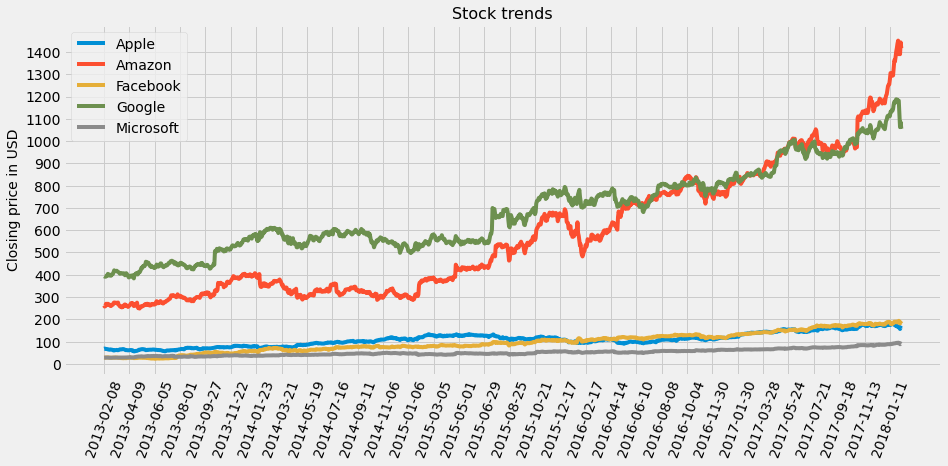

In [8]:
plt.figure(figsize=(14,6))
for i, key in enumerate(companies):
    plt.plot('date', 'close', data=companies[key], label=key)

plt.xticks(np.arange(0, 1260, 40), rotation=70)
plt.yticks(np.arange(0, 1450, 100))

plt.title('Stock trends', fontsize=16)
plt.ylabel('Closing price in USD', fontsize=14)

plt.legend();

The graph illustrates that Google and Amazon stocks had higher closing prices than the stocks of the other companies in the data&nbsp;set.

## Using a bar plot to compare movie scores

In this project, we will compare the scores that five movies have garnered on Rotten Tomatoes, a website that aggregates the reviews of movies and television shows. The scores are grouped into two categories, Tomatometer and Audience Score. The Tomatometer score of a movie is the percentage of approved critics who have given positive reviews about the movie. Audience Score, by contrast, represents the percentage of Rotten Tomato users who have given scores of 3.5+ out of 5 to a movie.

In [9]:
# Importing data

movie_scores = pd.read_csv('../input/dataviz/movie_scores.csv', index_col='MovieTitle')

In [10]:
movie_scores.head()

,Unnamed: 0,Tomatometer,AudienceScore
MovieTitle,,,
The Shape of Water,0,91,73
Black Panther,1,97,79
Dunkirk,2,92,81
The Martian,3,91,91
The Hobbit: An Unexpected Journey,4,64,83


In [11]:
# Removing irrelevant column

movie_scores.drop(movie_scores.columns[0], axis=1, inplace=True)

In [12]:
df = movie_scores.copy()

In [13]:
# Transforming the dataframe so that the two categories of scores, Tomatometer and Audience Score, 
# are in one column and the corresponding scores are in another column
# Setting MovieTitle as the index

df = df.stack().reset_index().set_index('MovieTitle').rename(columns={'level_1': 'ScoreCat', 0: 'Score'})

In [14]:
df.head()

,ScoreCat,Score
MovieTitle,,
The Shape of Water,Tomatometer,91
The Shape of Water,AudienceScore,73
Black Panther,Tomatometer,97
Black Panther,AudienceScore,79
Dunkirk,Tomatometer,92


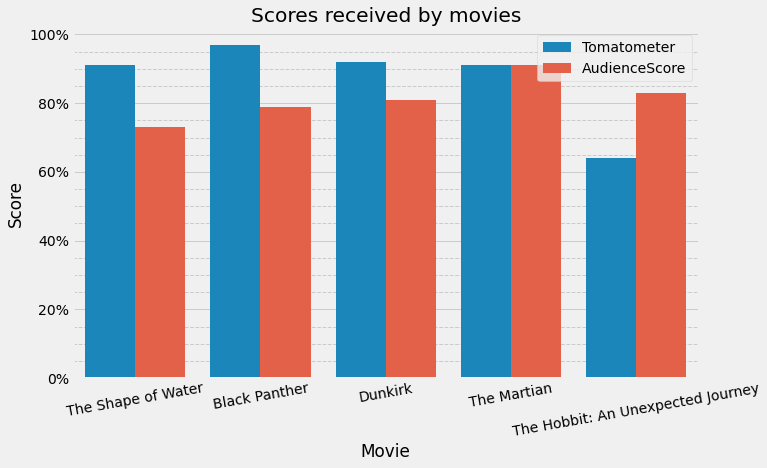

In [15]:
fig_size1 = (10, 6)
fig, ax = plt.subplots(figsize=fig_size1)

sns.barplot(x=df.index, y='Score', data=df, hue='ScoreCat', ax=ax)

leg=plt.legend()
leg.set_title('')

plt.xticks(rotation=10)
ax.set(xlabel='Movie', title='Scores received by movies')
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

ax.set_yticks(np.arange(0, 100, 5), minor=True)
ax.yaxis.grid(which='minor', linestyle='--');

The graphs shows that a higher percentage of the audience, compared to the critics, preferred The Hobbit. In the case of The Martian, the critics' and the audience's scores were the same. In the case of the other movies, the critics' scores were higher.

## Depicting water usage via a pie chart

In [16]:
# Importing data

water_use = pd.read_csv('../input/dataviz/water_usage.csv', index_col=0)

In [17]:
water_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Usage       6 non-null      object
 1   Percentage  6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes


In [18]:
water_use.head()

,Usage,Percentage
0,Leak,12
1,Clothes Washer,17
2,Faucet,19
3,Shower,20
4,Toilet,24


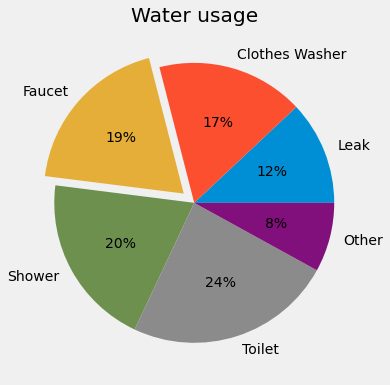

In [19]:
# Drawing pie chart

fig, ax = plt.subplots(figsize=fig_size1)

ax.pie('Percentage', explode=(0, 0, 0.1, 0, 0, 0), labels='Usage', data=water_use, autopct='%.0f%%')

ax.set_title('Water usage');

## Depicting water usage via a Squarify tree map

In [20]:
# Importing Squarify

import squarify

# Creating labels for the proposed tree map

labels = water_use.Usage + ' (' + water_use.Percentage.astype('str') + '%)'

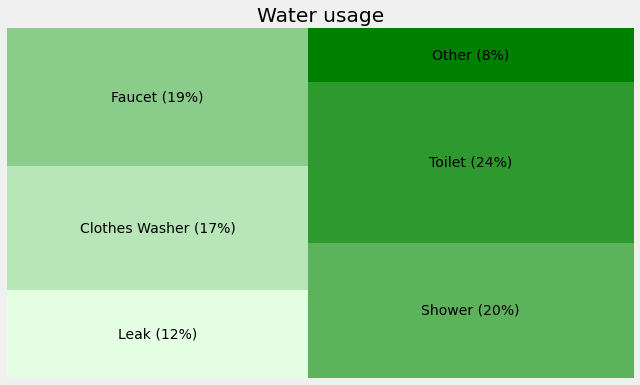

In [21]:
# Creating the tree map

fig, ax = plt.subplots(figsize=fig_size1)

squarify.plot(sizes=water_use.Percentage, label=labels, 
              color=sns.light_palette('green', water_use.shape[0]), ax=ax)

ax.axis('off')
ax.set_title('Water usage');

## Visualizing restaurant performance using a stacked bar graph

In this project, we will visualize the bill amounts that smoking and nonsmoking guests generated at a restaurant. To depict the share of each category of guests in the total bill generated, we will use a pie chart. And to depict the total bill each category of guests generated on each business day, we will use a stacked bar graph.

In [22]:
# Importing data

bills = pd.read_csv('../input/hotel-bills/bills.csv')

In [23]:
bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [24]:
bills.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
# Converting the smoker and day columns into the categorical type and
# rearranging their values so that they are displayed in a specific order in the
# proposed graphs

bills.smoker = bills.smoker.astype(pd.api.types.CategoricalDtype(categories=["Yes", "No"]))

bills.day = bills.day.astype(pd.api.types.CategoricalDtype(categories=["Thur", "Fri", "Sat", "Sun"]))

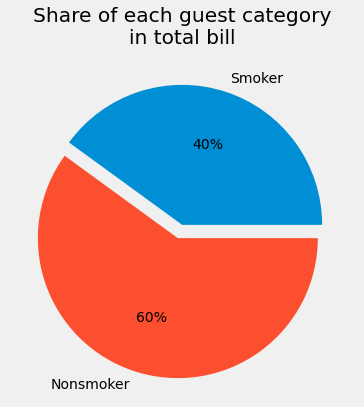

In [26]:
# Drawing a pie chart to depict the share of smokers and nonsmokers in the overall bill

fig, ax = plt.subplots(figsize=fig_size1)

ax.pie(bills.groupby('smoker').total_bill.sum(), explode=(0, 0.1),
       labels=['Smoker', 'Nonsmoker'], autopct='%.0f%%')

ax.set_title('Share of each guest category\nin total bill');

In [27]:
# Creating a pivot table to group total bills by guest category and day

totals_pivot = bills.pivot_table('total_bill', index='day', columns='smoker', aggfunc='sum')

In [28]:
totals_pivot.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 4 entries, Thur to Sun
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yes     4 non-null      float64
 1   No      4 non-null      float64
dtypes: float64(2)
memory usage: 260.0 bytes


In [29]:
totals_pivot

smoker,Yes,No
day,,
Thur,326.24,770.09
Fri,252.20,73.68
Sat,893.62,884.78
Sun,458.28,1168.88


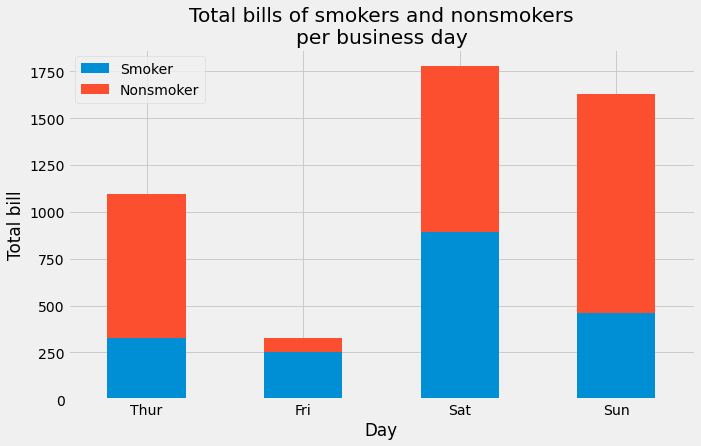

In [30]:
# Drawing the stacked bar graph

fig, ax = plt.subplots(figsize=fig_size1)

totals_pivot.plot(kind='bar', stacked=True, rot=0, ax=ax)

leg=plt.legend(['Smoker', 'Nonsmoker'])
leg.set_title('')

ax.set(xlabel='Day', ylabel='Total bill', 
       title='Total bills of smokers and nonsmokers\nper business day');

The total bills of nonsmokers were the highest on Sundays. The total bills of smokers, however, were the highest on Saturdays. Interestingly, the bills of nonsmokers on Saturdays were almost at par with those of smokers.  

## Comparing phone sales using a stacked area chart

In this project, we will compare the quarterly sales of five leading phone manufacturers.

In [31]:
# Importing data

df = pd.read_csv('../input/dataviz/smartphone_sales.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8 non-null      int64 
 1   Quarter     8 non-null      object
 2   Apple       8 non-null      int64 
 3   Samsung     8 non-null      int64 
 4   Huawei      8 non-null      int64 
 5   Xiaomi      8 non-null      int64 
 6   OPPO        8 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 576.0+ bytes


In [33]:
# Removing irrelevant column

df.drop('Unnamed: 0', axis=1, inplace=True)

In [34]:
df.head()

,Quarter,Apple,Samsung,Huawei,Xiaomi,OPPO
0,3Q16,43001,71734,32490,14926,24591
1,4Q16,77039,76783,40804,15751,26705
2,1Q17,51993,78776,34181,12707,30922
3,2Q17,44315,82855,35964,21179,26093
4,3Q17,45442,85605,36502,26853,29449


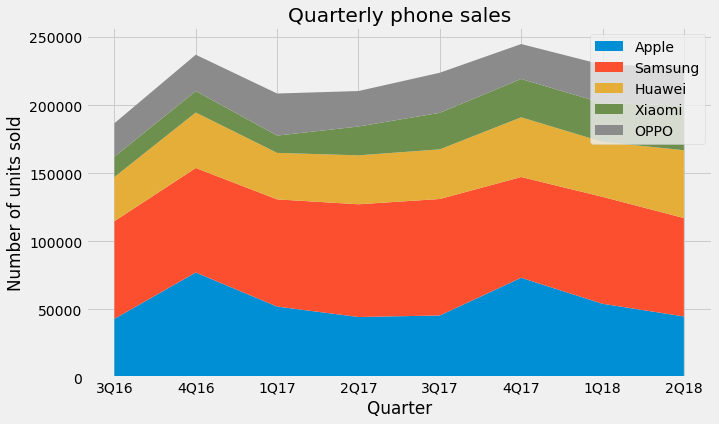

In [35]:
fig, ax = plt.subplots(figsize=fig_size1)

labels = df.columns[1:]
plt.stackplot(*df.columns, data=df, labels=labels)

leg=plt.legend()
leg.set_title('')

ax.set(xlabel='Quarter', ylabel='Number of units sold', title='Quarterly phone sales');

The graph indicates that Samsung had the highests quarterly sales.

## Visualizing intelligence quotient (IQ) using a histogram, a box plot, and a violin plot

In this project, we will visualize the IQ scores of 100 people from multiple groups. These scores are stored in five lists that contain 100 elements each. We will begin by importing these lists.

In [36]:
import pickle

with open('../input/pickles/pickled_lists.pickle', 'rb') as f:
    iq_scores = pickle.load(f)
    group_a = pickle.load(f)
    group_b = pickle.load(f)
    group_c = pickle.load(f)
    group_d = pickle.load(f)

In [37]:
# Saving the lists in a dataframe

iqs = pd.DataFrame({
    'group': ['Group A'] * len(group_a) + ['Group B'] * len(group_b) + ['Group C']\
    * len(group_c) + ['Group D'] * len(group_d),
    'iq_score': group_a + group_b + group_c + group_d
})

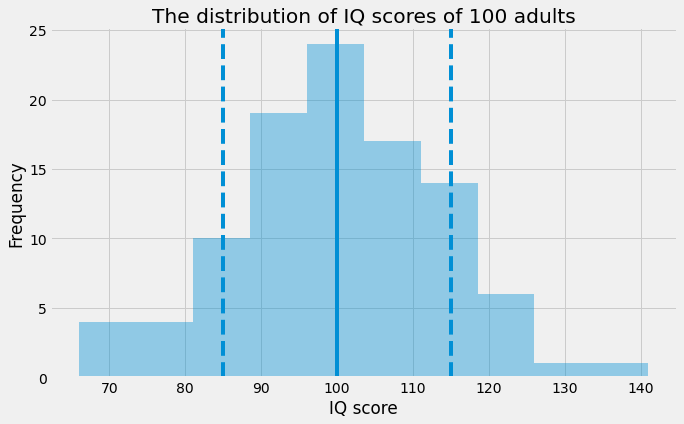

In [38]:
# Drawing a histogram based on iq_scores

fig, ax = plt.subplots(figsize=fig_size1) 

sns.distplot(iq_scores, kde=False, bins=10, ax=ax)
plt.axvline(85, linestyle='dashed')
plt.axvline(100)
plt.axvline(115, linestyle='dashed')

ax.set_title('The distribution of IQ scores of 100 adults')
ax.set_xlabel('IQ score')
ax.set_ylabel('Frequency');

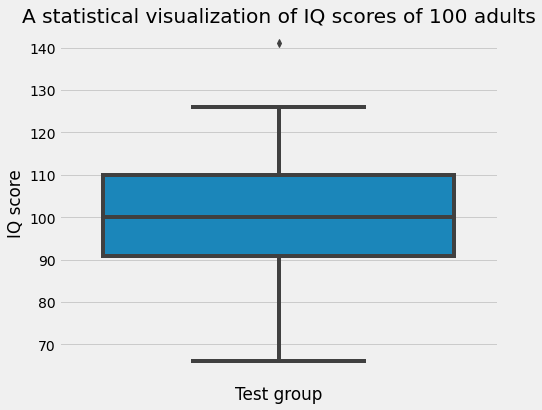

In [39]:
# Drawing a boxplot based on iq_scores

fig, ax = plt.subplots(figsize=(7,6))

sns.boxplot(y=iq_scores, ax=ax)

ax.set_ylabel('IQ score')
ax.set_xlabel('Test group')
ax.set_title('A statistical visualization of IQ scores of 100 adults');

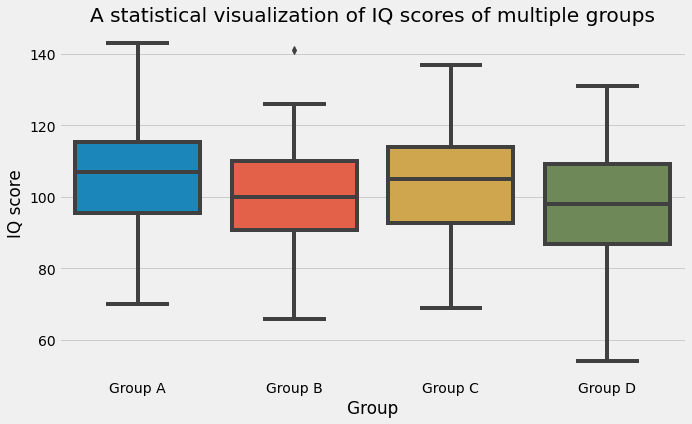

In [40]:
# Drawing a boxplot based on the dataframe, iqs, that contains grouped scores

fig, ax = plt.subplots(figsize=fig_size1)

sns.boxplot('group', 'iq_score', data=iqs, ax=ax)

ax.set_xlabel('Group')
ax.set_ylabel('IQ score')
ax.set_title('A statistical visualization of IQ scores of multiple groups');

People in group A have the highest median scores.

Next, let us compare the groups using a violin plot.

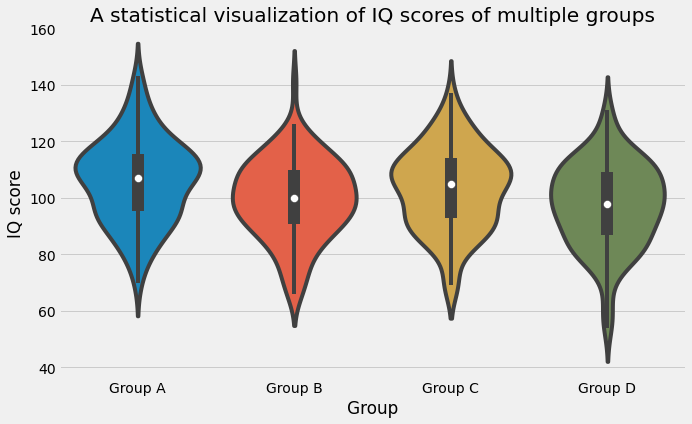

In [41]:
fig, ax = plt.subplots(figsize=fig_size1)

sns.violinplot('group', 'iq_score', data=iqs, ax=ax)

ax.set_xlabel('Group')
ax.set_ylabel('IQ score')
ax.set_title('A statistical visualization of IQ scores of multiple groups');

## Visualizing correlations using a scatter plot

In this project, we will compare the body masses and maximum lifespans of different classes of birds and animals.

In [42]:
# Importing data

organisms = pd.read_csv('../input/dataviz/anage_data.csv')

In [43]:
organisms.head(3)

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),Male maturity (days),Gestation/Incubation (days),Weaning (days),Litter/Clutch size,Litters/Clutches per year,Inter-litter/Interbirth interval,Birth weight (g),Weaning weight (g),Adult weight (g),Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
0,0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
1,1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN
2,2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN


In [44]:
# Removing an extraneous column

organisms.drop('Unnamed: 0', axis=1, inplace=True)

In [45]:
# Removing rows with NaN or missing values in relevant columns of the  data frame

longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'

organisms = organisms[np.isfinite(organisms[longevity]) & np.isfinite(organisms[mass])]

In [46]:
# Retaining only specific classes of organisms in the data frame

organism_classes = ['Amphibia', 'Aves', 'Mammalia', 'Reptilia']

organisms = organisms[organisms.Class.isin(organism_classes)]

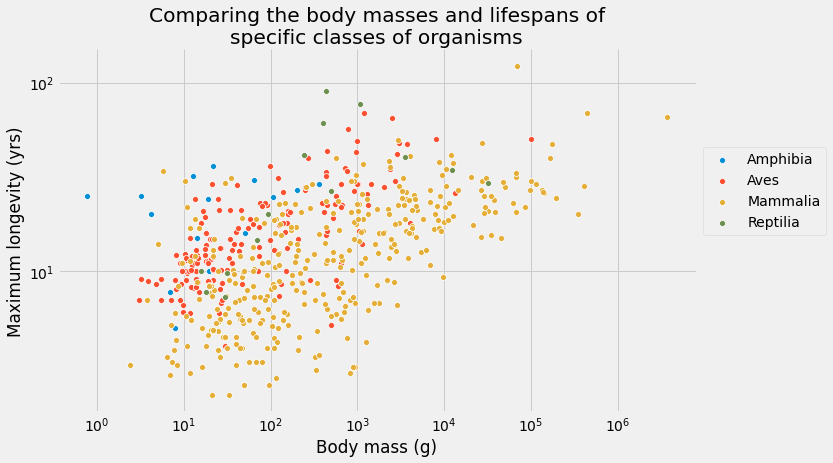

In [47]:
height_val = 6
aspect_val = 10/6

g = sns.FacetGrid(organisms, hue='Class', height=height_val, aspect=aspect_val)
g = g.map(sns.scatterplot, mass, longevity).set(xscale='log', yscale='log')
    
leg=plt.legend(bbox_to_anchor=(1, 0.75))

plt.title('Comparing the body masses and lifespans of\nspecific classes of organisms');

## Identifying top employee using radar charts

In [48]:
# Creating a data frame that lists the attributes of four employees

df = pd.DataFrame({
'Employee': ['Alex', 'Alice', 'Chris', 'Jennifer'],
'Efficient': [5, 4, 4, 3,],
'Quality conscious': [5, 5, 3, 3],
'Committed': [5, 4, 4, 4],
'Sincere': [4, 4, 4, 3],
'Cooperative': [4, 3, 4, 5]
})

In [49]:
df.head()

,Employee,Efficient,Quality conscious,Committed,Sincere,Cooperative
0,Alex,5,5,5,4,4
1,Alice,4,5,4,4,3
2,Chris,4,3,4,4,4
3,Jennifer,3,3,4,3,5


In [50]:
# Creating angle values for the proposed radar plots

employees = list(df.values[:, 0])
attributes = list(df.columns[1:])
values = list(df.values[:, 1:])

angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]

In [51]:
# Re-adding the first angle and value so as to be able to close the plots

angles += angles[:1]

values = np.asarray(values)
values = np.concatenate([values, values[:, 0:1]], axis=1)

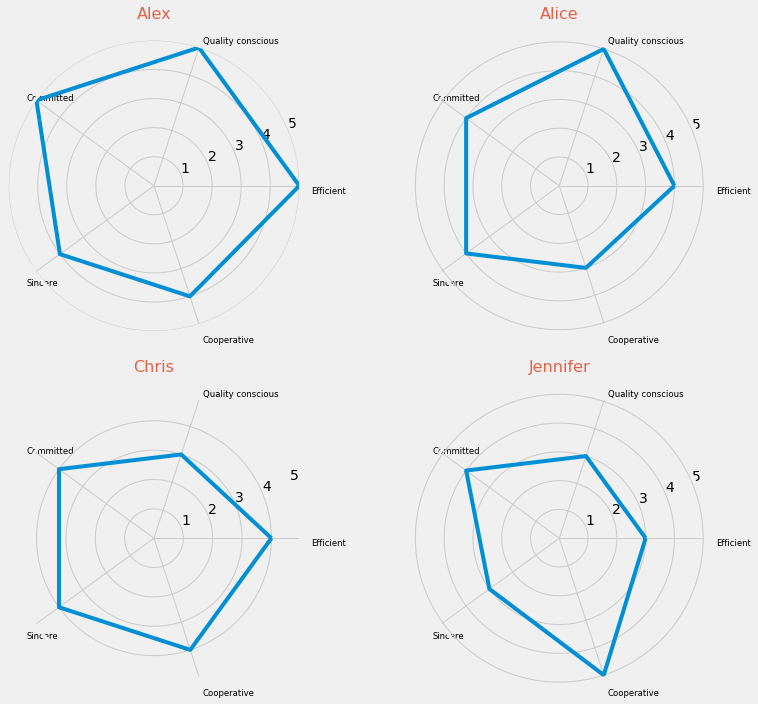

In [52]:
# Drawing the plots

plt.figure(figsize=(12, 10))

for i in range(4):
    ax = plt.subplot(2, 2, i + 1, polar=True)
    ax.plot(angles, values[i])
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_xticks(angles)
    ax.set_xticklabels(attributes, va = 'top', ha = 'left', fontsize=8.5)
    ax.set_title(employees[i], fontsize=16, color='#e36149')

plt.tight_layout()

## Using GridSpec to create a scatter plot with marginal histograms

In [53]:
# Loading data

df = pd.read_csv('../input/dataviz/anage_data.csv')

In [54]:
# Including only the Aves class with a body mass < 4000 and
# no null values in relevant columns

aves = df[df.Class == 'Aves']
aves = aves[(aves[longevity].notnull()) & (aves[mass].notnull())]
aves = aves[aves[mass] < 4000]

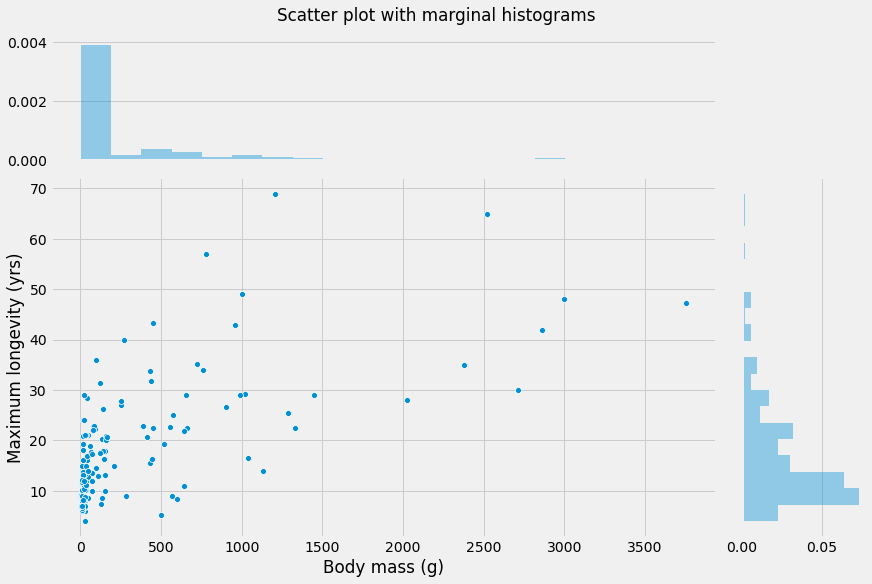

In [55]:
fig_size2 = (12, 8)
fig = plt.figure(constrained_layout=True, figsize=fig_size2)
grid = fig.add_gridspec(4, 4)

ax1 = fig.add_subplot(grid[0, :-1])
sns.distplot(aves[mass], bins=20, kde=False, norm_hist=True, ax = ax1)
ax1.set_xticks([])
ax1.set_xlabel('')

ax2 = fig.add_subplot(grid[1:, :-1])
sns.scatterplot(mass, longevity, data=aves, ax=ax2)

ax3 = fig.add_subplot(grid[1:, -1])
sns.distplot(aves[longevity], bins=20, kde=False, norm_hist=True, vertical=True, ax = ax3)
ax3.set_yticks([])
ax3.set_ylabel('')

fig.suptitle('Scatter plot with marginal histograms');

## Displaying images in a grid

In [56]:
# Preparing to load images

import matplotlib.image as mpimg

In [57]:
import glob
image_paths = glob.glob('../input/dataviz/*.jpg')

In [58]:
# Loading images

imgs = [mpimg.imread(img_path) for img_path in image_paths]

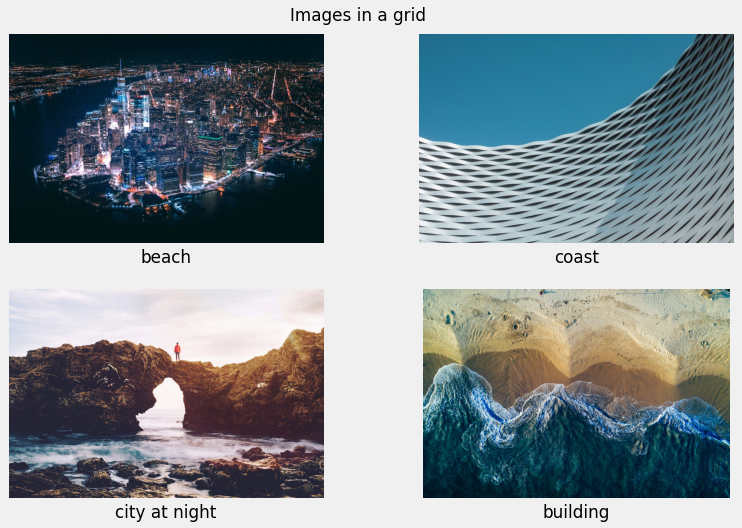

In [59]:
fig, ax = plt.subplots(2, 2, figsize=fig_size2)

labels = ['beach', 'coast', 'city at night', 'building']

for img, label, subplot in zip(imgs, labels, ax.flatten()):
    subplot.imshow(img)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_xlabel(label)
    
fig.suptitle('Images in a grid', y=0.925);

## Using colors to highlight temperature changes

In [60]:
# Loading data

temps = pd.read_csv('../input/dataviz/northern_surface_temperature.csv', index_col='Year')

In [61]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     139 non-null    float64
 1   Feb     139 non-null    float64
 2   Mar     139 non-null    float64
 3   Apr     139 non-null    float64
 4   May     139 non-null    float64
 5   Jun     139 non-null    float64
 6   Jul     139 non-null    float64
 7   Aug     139 non-null    float64
 8   Sep     139 non-null    float64
 9   Oct     139 non-null    float64
 10  Nov     139 non-null    float64
 11  Dec     139 non-null    float64
dtypes: float64(12)
memory usage: 14.1 KB


In [62]:
temps.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2014,0.97,0.71,1.20,1.08,0.90,0.81,0.76,0.89,0.83,0.93,0.79,1.10
2015,1.19,1.18,1.32,1.03,1.04,1.05,0.92,1.01,1.16,1.29,1.37,1.53
2016,1.55,1.93,1.91,1.49,1.11,1.12,1.04,1.11,1.22,1.03,1.11,1.03
2017,1.39,1.50,1.51,1.20,0.92,0.93,0.96,1.01,1.00,1.05,1.23,1.40
2018,1.14,1.23,1.18,0.97,1.01,0.86,0.90,0.86,0.96,1.23,0.98,1.09


In [63]:
# Transposing the data frame

temps = temps.transpose()

In [64]:
# Creating a custom diverging palette

temp_palette = sns.diverging_palette(240, 15, s=99, as_cmap=True)

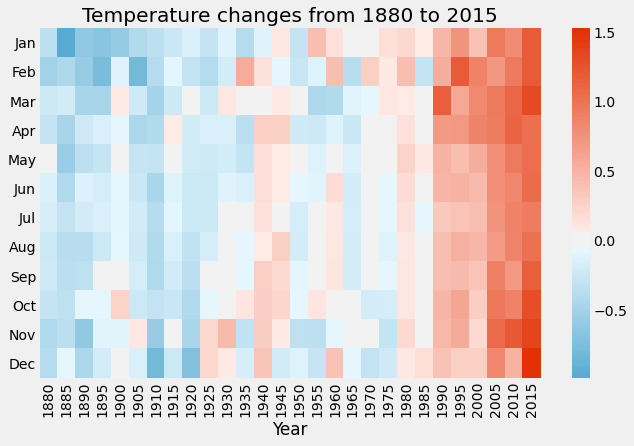

In [65]:
fig, ax = plt.subplots(figsize=fig_size1)

# Plotting changes in temperature every five years

sns.heatmap(temps.iloc[:, ::5], cmap=temp_palette, center=0, ax=ax)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title('Temperature changes from 1880 to 2015');

## Finding patterns in flight passengers' data via a heat&nbsp;map

In [66]:
# Loading data

flight_data = pd.read_csv('../input/dataviz/flight_details.csv')

In [67]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Years       144 non-null    int64 
 1   Months      144 non-null    object
 2   Passengers  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [68]:
flight_data.head(3)

,Years,Months,Passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132


In [69]:
# Transforming the data frame to make it conducive to graphing

flight_data = flight_data.pivot('Months', 'Years', 'Passengers')

In [70]:
flight_data.head(3)

Years,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Months,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432


In [71]:
# Updating index

import calendar

flight_data = flight_data.reindex(list(calendar.month_name)[1:])

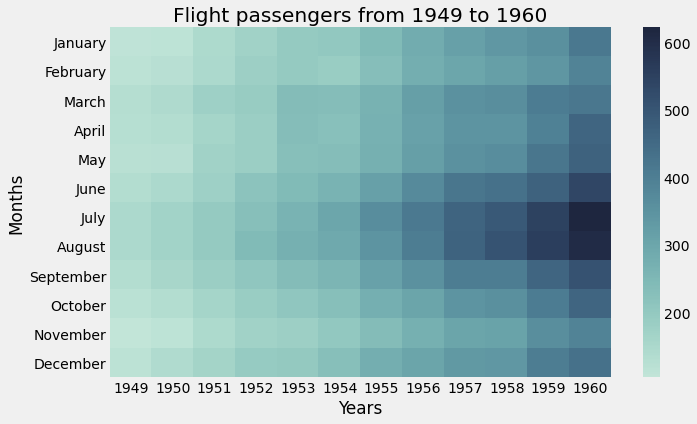

In [72]:
fig, ax = plt.subplots(figsize=fig_size1)

sns.heatmap(flight_data, cmap=sns.cubehelix_palette(rot=-.3, as_cmap=True), ax=ax)

ax.set_title('Flight passengers from 1949 to 1960');

The heat map shows that the number of flight passengers increased consistently over the years. In addition, every year, more people traveled in July and August than in the other months.

## Depicting top YouTube channels using a facet grid

In [73]:
# Loading data

channels = pd.read_csv('../input/dataviz/YouTube.csv')

In [74]:
channels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Channel              30 non-null     object 
 1   Subs (in millions)   30 non-null     float64
 2   Views (in millions)  30 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [75]:
channels.columns = ['YouTube Channel', 'Subscribers', 'Viewers']

In [76]:
channels.head()

,YouTube Channel,Subscribers,Viewers
0,T-Series,123.0,94410
1,Canal KondZilla,54.5,27860
2,Zee Music Company,48.5,22689
3,Ed Sheeran,43.2,18905
4,EminemMusic,40.2,773


In [77]:
df_melted = pd.melt(channels, id_vars=['YouTube Channel'],
            value_vars=['Subscribers', 'Viewers'], var_name='Type',
            value_name='Users in millions')

In [78]:
df_melted.head()

,YouTube Channel,Type,Users in millions
0,T-Series,Subscribers,123.0
1,Canal KondZilla,Subscribers,54.5
2,Zee Music Company,Subscribers,48.5
3,Ed Sheeran,Subscribers,43.2
4,EminemMusic,Subscribers,40.2


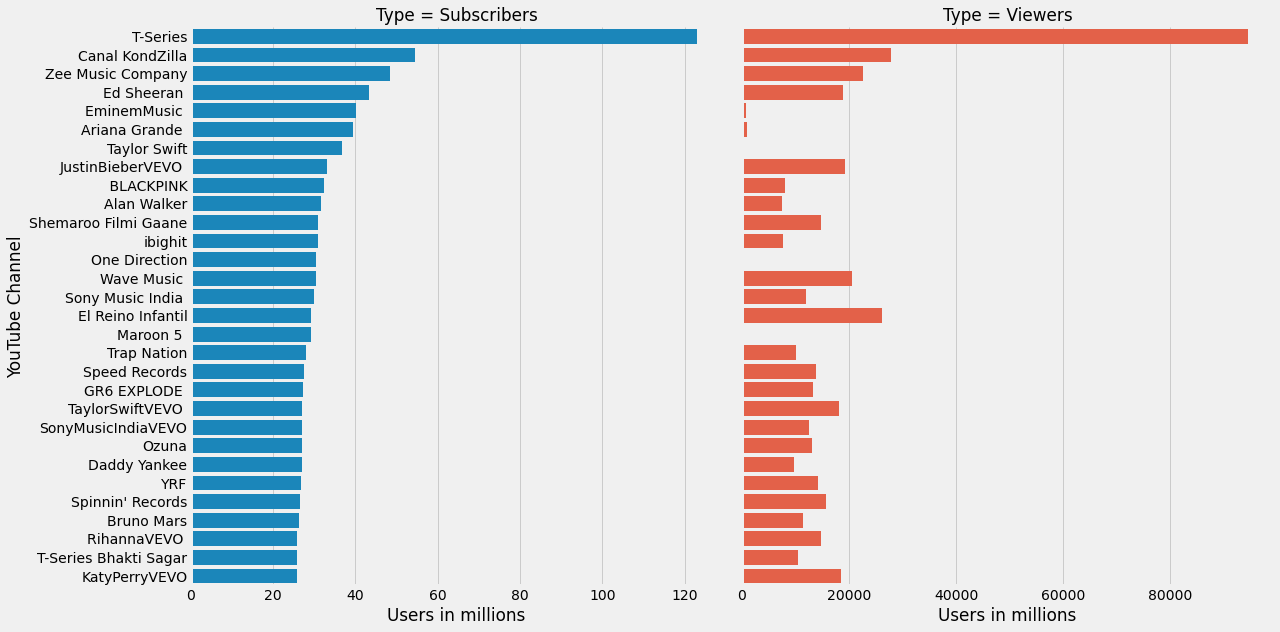

In [79]:
times = df_melted['YouTube Channel'].unique()

g = sns.FacetGrid(df_melted, col='Type', hue='Type', sharex=False, height=9)
g = g.map(sns.barplot, 'Users in millions', 'YouTube Channel', order=times)

The graphs indicate that T-Series has the highest numbers of subscribers and viewers.h

## Visualizing the linear relationship between a pair of quantitative variables

In this project, we will try to identify any linear relationships between the body masses and lifespans of mammals.

In [80]:
# Loading data

df = pd.read_csv('../input/dataviz/anage_data.csv')

In [81]:
# Including only the Mammalia class with a body mass < 200000 and
# no null values in relevant columns

mammalia = df[df.Class == 'Mammalia']
mammalia = mammalia[(mammalia[longevity].notnull()) & (mammalia[mass].notnull())]
mammalia = mammalia[mammalia[mass] < 200000]

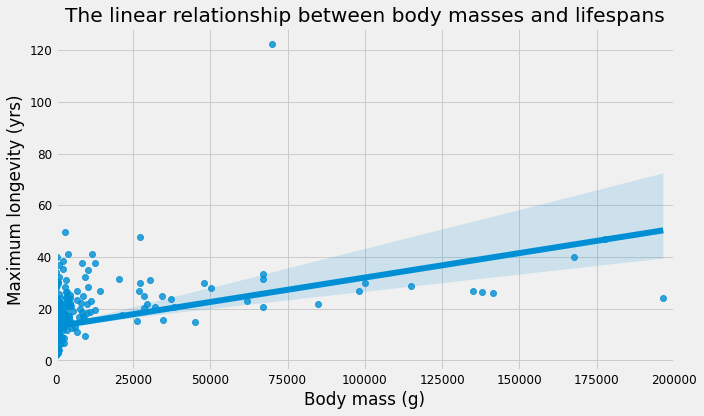

In [82]:
fig, ax = plt.subplots(figsize=fig_size1)

sns.regplot(mass, longevity, data=mammalia, ax=ax)

ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.set_xlim(left = 0, right = 200000)
ax.set_title('The linear relationship between body masses and lifespans')

plt.tight_layout()

## Visualizing the interrelations between education, annual salary, and weekly working&nbsp;hours

In [83]:
# Loading data

ed_data = pd.read_csv('../input/dataviz/age_salary_hours.csv')

In [84]:
ed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            500 non-null    int64  
 1   Annual Salary  500 non-null    float64
 2   Weekly hours   500 non-null    float64
 3   Education      500 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 15.8+ KB


In [85]:
ed_data.head()

,Age,Annual Salary,Weekly hours,Education
0,72,160000.0,40.0,Bachelor's degree or higher
1,72,100000.0,50.0,Bachelor's degree or higher
2,31,120000.0,40.0,Bachelor's degree or higher
3,28,45000.0,40.0,Bachelor's degree or higher
4,54,85000.0,40.0,Bachelor's degree or higher


First, we will create a tree map to present the percentage of each education type.

In [86]:
ed_percentages = ed_data.Education.value_counts()/len(ed_data)*100

ed_percentages

Bachelor's degree or higher    47.4
High school diploma            21.4
Attended college, no degree    17.8
Associate's degree             10.0
No diploma                      3.4
Name: Education, dtype: float64

In [87]:
# Creating labels for the proposed tree map

labels = ed_percentages.index + '\n(' + np.round(ed_percentages.values, 2).astype('str') + '%)'

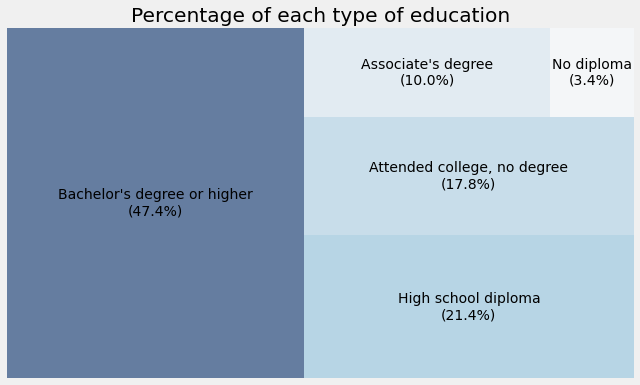

In [88]:
# Creating the tree map

import matplotlib

plt.figure(figsize=fig_size1)

norm = matplotlib.colors.Normalize(vmin=min(ed_percentages.values), vmax=max(ed_percentages.values))
colors = [matplotlib.cm.Blues(norm(value)) for value in ed_percentages.values]

squarify.plot(sizes=ed_percentages.values, label=labels, color=colors, alpha=.6)

plt.axis('off')
plt.title('Percentage of each type of education');

Next, we will draw violin plots to depict the impact of education on annual salary and weekly working&nbsp;hours.

In [89]:
ordered_degrees = ['No diploma', 'High school diploma', 
                   'Attended college, no degree', "Associate's degree", 
                   "Bachelor's degree or higher"]

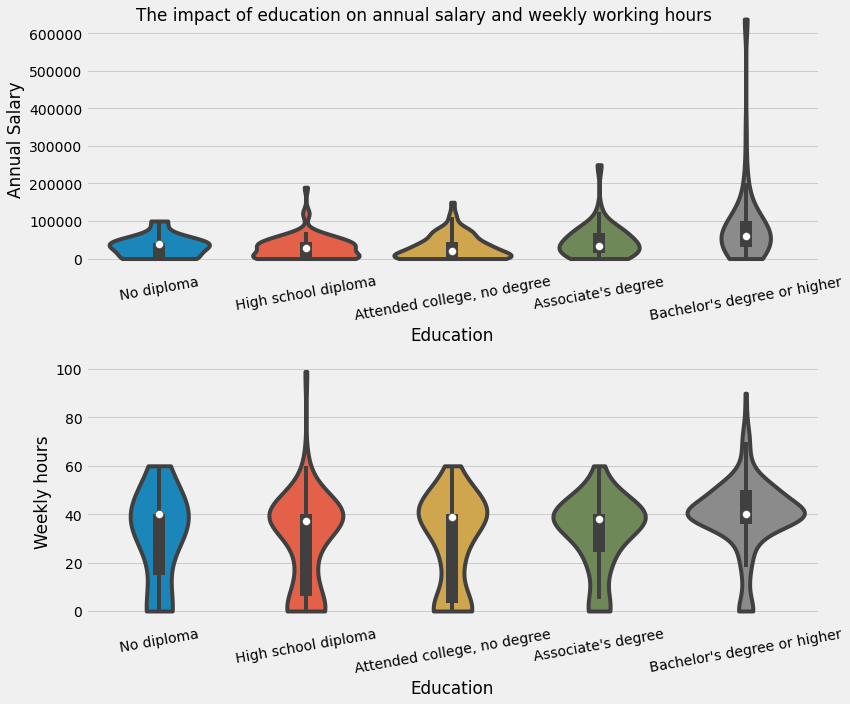

In [90]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

sns.violinplot('Education', 'Annual Salary', data=ed_data[ed_data.Age<65], cut=0,
               order=ordered_degrees, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=10)

sns.violinplot('Education', 'Weekly hours', data=ed_data[ed_data.Age<65], cut=0,
               order=ordered_degrees, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=10)

fig.suptitle('The impact of education on annual salary and weekly working hours')

plt.tight_layout();

## Visualizing household income and wage data from NYC and NY

In [91]:
# Loading data

housing = pd.read_csv('../input/housing-population/housing_ny.csv')
population = pd.read_csv('../input/housing-population/population_ny.csv')

In [92]:
housing.head()

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,TYPE,ACCESS,ACR,AGS,BATH,BDSP,BLD,BROADBND,COMPOTHX,CONP,DIALUP,ELEP,FS,FULP,GASP,HFL,HISPEED,HOTWAT,INSP,LAPTOP,MHP,MRGI,MRGP,MRGT,MRGX,OTHSVCEX,REFR,RMSP,RNTM,RNTP,RWAT,RWATPR,SATELLITE,SINK,SMARTPHONE,SMP,STOV,TABLET,TEL,TEN,VACS,VALP,VEH,WATP,YBL,FES,FINCP,FPARC,GRNTP,GRPIP,HHL,HHLANP,HHT,HINCP,HUGCL,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MULTG,MV,NOC,NPF,NPP,NR,NRC,OCPIP,PARTNER,PLM,PLMPRP,PSF,R18,R60,R65,RESMODE,SMOCP,SMX,SRNT,SSMC,SVAL,TAXP,WIF,WKEXREL,WORKSTAT,FACCESSP,FACRP,FAGSP,FBATHP,FBDSP,FBLDP,FBROADBNDP,FCOMPOTHXP,FCONP,FDIALUPP,FELEP,FFINCP,FFSP,FFULP,FGASP,FGRNTP,FHFLP,FHINCP,FHISPEEDP,FHOTWATP,FINSP,FKITP,FLAPTOPP,FMHP,FMRGIP,FMRGP,FMRGTP,FMRGXP,FMVP,FOTHSVCEXP,FPLMP,FPLMPRP,FREFRP,FRMSP,FRNTMP,FRNTP,FRWATP,FRWATPRP,FSATELLITEP,FSINKP,FSMARTPHONP,FSMOCP,FSMP,FSMXHP,FSMXSP,FSTOVP,FTABLETP,FTAXP,FTELP,FTENP,FVACSP,FVALP,FVEHP,FWATP,FYBLP,WGTP1,WGTP2,WGTP3,WGTP4,WGTP5,WGTP6,WGTP7,WGTP8,WGTP9,WGTP10,WGTP11,WGTP12,WGTP13,WGTP14,WGTP15,WGTP16,WGTP17,WGTP18,WGTP19,WGTP20,WGTP21,WGTP22,WGTP23,WGTP24,WGTP25,WGTP26,WGTP27,WGTP28,WGTP29,WGTP30,WGTP31,WGTP32,WGTP33,WGTP34,WGTP35,WGTP36,WGTP37,WGTP38,WGTP39,WGTP40,WGTP41,WGTP42,WGTP43,WGTP44,WGTP45,WGTP46,WGTP47,WGTP48,WGTP49,WGTP50,WGTP51,WGTP52,WGTP53,WGTP54,WGTP55,WGTP56,WGTP57,WGTP58,WGTP59,WGTP60,WGTP61,WGTP62,WGTP63,WGTP64,WGTP65,WGTP66,WGTP67,WGTP68,WGTP69,WGTP70,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
0,H,2017000000046,2,4008,1,36,1000000,1011189,347,0,1,NaN,1.0,NaN,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,1.0,9.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,3.0,210000.0,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347,111,367,578,614,647,359,353,348,331,356,107,103,100,343,571,338,108,342,108,369,582,323,104,102,92,344,342,334,328,341,597,583,593,335,103,372,592,324,584,328,96,369,572,585,572,334,375,362,383,319,104,102,100,363,568,349,98,342,106,321,535,354,101,114,105,357,366,337,339,387,619,594,551,349,104,357,578,344,590
1,H,2017000000050,2,902,1,36,1000000,1011189,122,2,1,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,400.0,2.0,2.0,2.0,1.0,1.0,9.0,600.0,1.0,NaN,NaN,NaN,NaN,3.0,2.0,1.0,8.0,NaN,NaN,1.0,9.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0,NaN,400000.0,2.0,400.0,1.0,1.0,296100.0,4.0,NaN,NaN,1.0,9500.0,1.0,296100.0,0.0,4.0,4.0,4.0,1.0,1.0,1.0,7.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,1.0,9.0,0.0,0.0,2.0,2.0,3.0,1675.0,NaN,0.0,0.0,1.0,68.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,126,202,37,44,206,137,118,201,108,200,117,122,118,37,107,35,120,119,39,219,117,36,201,176,42,113,115,40,129,33,123,149,123,213,136,181,121,110,199,38,108,185,36,34,237,114,108,217,124,212,141,133,112,37,125,32,136,120,34,204,121,35,226,205,33,123,140,39,105,34,116,128,113,215,137,221,118,116,195
2,H,2017000000068,2,4002,1,36,1000000,1011189,56,2,1,1.0,NaN,NaN,1.0,3.0,4.0,1.0,2.0,0.0,2.0,10.0,2.0,2.0,20.0,1.0,1.0,9.0,2300.0,1.0,NaN,2.0,4800.0,2.0,1.0,2.0,1.0,6.0,NaN,NaN,1.0,9.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,950000.0,0.0,1000.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,9500.0,5.0,177100.0,0.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,1.0,0.0,37.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0,3.0,5401.0,3.0,0.0,0.0,0.0,47.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,99,61,16,52,54,54,106,16,91,1

In [93]:
population.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,COW,DDRS,DEAR,DEYE,DOUT,DPHY,DRAT,DRATX,DREM,ENG,FER,GCL,GCM,GCR,HINS1,HINS2,HINS3,HINS4,HINS5,HINS6,HINS7,INTP,JWMNP,JWRIP,JWTR,LANX,MAR,MARHD,MARHM,MARHT,MARHW,MARHYP,MIG,MIL,MLPA,MLPB,MLPCD,MLPE,MLPFG,MLPH,MLPI,MLPJ,MLPK,NWAB,NWAV,NWLA,NWLK,NWRE,OIP,PAP,RELP,RETP,SCH,SCHG,SCHL,SEMP,SEX,SSIP,SSP,WAGP,WKHP,WKL,WKW,WRK,YOEP,ANC,ANC1P,ANC2P,DECADE,DIS,DRIVESP,ESP,ESR,FOD1P,FOD2P,HICOV,HISP,INDP,JWAP,JWDP,LANP,MIGPUMA,MIGSP,MSP,NAICSP,NATIVITY,NOP,OC,OCCP,PAOC,PERNP,PINCP,POBP,POVPIP,POWPUMA,POWSP,PRIVCOV,PUBCOV,QTRBIR,RAC1P,RAC2P,RAC3P,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACPI,RACSOR,RACWHT,RC,SCIENGP,SCIENGRLP,SFN,SFR,SOCP,VPS,WAOB,FAGEP,FANCP,FCITP,FCITWP,FCOWP,FDDRSP,FDEARP,FDEYEP,FDISP,FDOUTP,FDPHYP,FDRATP,FDRATXP,FDREMP,FENGP,FESRP,FFERP,FFODP,FGCLP,FGCMP,FGCRP,FHICOVP,FHINS1P,FHINS2P,FHINS3C,FHINS3P,FHINS4C,FHINS4P,FHINS5C,FHINS5P,FHINS6P,FHINS7P,FHISP,FINDP,FINTP,FJWDP,FJWMNP,FJWRIP,FJWTRP,FLANP,FLANXP,FMARP,FMARHDP,FMARHMP,FMARHTP,FMARHWP,FMARHYP,FMIGP,FMIGSP,FMILPP,FMILSP,FOCCP,FOIP,FPAP,FPERNP,FPINCP,FPOBP,FPOWSP,FPRIVCOVP,FPUBCOVP,FRACP,FRELP,FRETP,FSCHGP,FSCHLP,FSCHP,FSEMP,FSEXP,FSSIP,FSSP,FWAGP,FWKHP,FWKLP,FWKWP,FWRKP,FYOEP,PWGTP1,PWGTP2,PWGTP3,PWGTP4,PWGTP5,PWGTP6,PWGTP7,PWGTP8,PWGTP9,PWGTP10,PWGTP11,PWGTP12,PWGTP13,PWGTP14,PWGTP15,PWGTP16,PWGTP17,PWGTP18,PWGTP19,PWGTP20,PWGTP21,PWGTP22,PWGTP23,PWGTP24,PWGTP25,PWGTP26,PWGTP27,PWGTP28,PWGTP29,PWGTP30,PWGTP31,PWGTP32,PWGTP33,PWGTP34,PWGTP35,PWGTP36,PWGTP37,PWGTP38,PWGTP39,PWGTP40,PWGTP41,PWGTP42,PWGTP43,PWGTP44,PWGTP45,PWGTP46,PWGTP47,PWGTP48,PWGTP49,PWGTP50,PWGTP51,PWGTP52,PWGTP53,PWGTP54,PWGTP55,PWGTP56,PWGTP57,PWGTP58,PWGTP59,PWGTP60,PWGTP61,PWGTP62,PWGTP63,PWGTP64,PWGTP65,PWGTP66,PWGTP67,PWGTP68,PWGTP69,PWGTP70,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2017000000050,2,1,902,1,36,1011189,122,72,1,NaN,1.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1,2,1,2,2,2,2,0.0,10.0,1.0,1.0,2.0,1,2.0,2.0,3.0,2.0,1988.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0,0.0,1.0,NaN,22.0,0.0,2,0.0,2600.0,160000.0,40.0,1.0,2.0,1.0,NaN,2,142,111,NaN,2,1.0,NaN,1.0,6000.0,NaN,1,1,8560.0,120.0,79.0,NaN,NaN,NaN,1.0,711,1,NaN,0.0,20.0,4.0,160000.0,162600.0,36,501.0,900.0,36.0,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0.0,2.0,2.0,NaN,NaN,111021,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,36,126,202,38,44,205,137,118,201,108,199,117,123,119,37,108,36,120,119,39,219,117,36,201,177,42,113,114,39,130,32,124,149,124,213,137,181,122,109,199,38,109,185,36,34,237,114,108,217,124,213,141,133,112,36,125,33,137,119,34,205,121,36,226,204,32,123,140,39,105,34,117,128,113,215,136,222,119,116,194
1,P,2017000000050,2,2,902,1,36,1011189,118,72,1,NaN,1.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1,2,1,2,2,2,2,0.0,10.0,1.0,1.0,2.0,1,2.0,2.0,2.0,2.0,1988.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,3.0,0.0,0.0,1,3500.0,1.0,NaN,24.0,0.0,1,0.0,30000.0,100000.0,50.0,1.0,2.0,1.0,NaN,2,89,22,NaN,2,1.0,NaN,1.0,6000.0,NaN,1,1,7870.0,84.0,43.0,NaN,NaN,NaN,1.0,611M1,1,NaN,0.0,8220.0,NaN,100000.0,133500.0,34,501.0,900.0,36.0,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0.0,2.0,2.0,NaN,NaN,514XXX,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,128,216,30,41,197,137,110,179,110,210,116,117,104,34,108,33,103,118,34,213,140,33,195,205,41,101,115,38,117,32,102,131,113,217,141,208,127,106,194,33,105,180,35,37,193,107,119,188,113,211,112,115,118,39,116,38,143,107,41,198,120,36,209,208,31,137,129,38,115,30,125,129,105,182,113,194,105,125,204
2,P,2017000000068,2,1,4002,1,36,1011189,56,31,1,NaN,1.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1,2,2,2,2,2,2,13500.0,45.0,NaN,9.0,2.0,5,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0

In [94]:
# Filtering the data frames based on public use microdata area (PUMA) codes

# PUMA ranges

pumas = {
    'bronx': [3701, 3710],
    'manhatten': [3801, 3810],
    'staten_island': [3901, 3903],
    'brooklyn': [4001, 4017],
    'queens': [4101, 4114],
    'nyc': [3701, 4114]
}

In [95]:
def puma_filter(df, puma_ranges):
    '''
    Subsets a data set based on supplied ranges
    '''
    return df.loc[(df.PUMA >= puma_ranges[0]) & (df.PUMA <= puma_ranges[1])]

In [96]:
# Creating subset data frames based on the PUMAs

h_bronx = puma_filter(housing, pumas['bronx'])
h_manhatten = puma_filter(housing, pumas['manhatten'])
h_staten_island = puma_filter(housing, pumas['staten_island'])
h_brooklyn = puma_filter(housing, pumas['brooklyn'])
h_queens = puma_filter(housing, pumas['queens'])
h_nyc = puma_filter(housing, pumas['nyc'])

p_nyc = puma_filter(population, pumas['nyc'])

In [97]:
# Setting median household income

us_income_median = 60336

# Specifying income adjustment

income_adjustment = housing.loc[0, ['ADJINC']].values[0] / 1e6

In [98]:
# Specifying functions to calculate weighted median incomes of NYC households

def weighted_frequency(values, weights):
    weighted_values = []
    for value, weight in zip(values, weights):
        weighted_values.extend(np.repeat(value, weight))
    return weighted_values


def weighted_median(values, weights):
    return np.median(weighted_frequency(values, weights))

def median_household_income(df):
    query = df.loc[np.isfinite(df['HINCP']), ['HINCP', 'WGTP']].values
    return np.round(weighted_median(query[:, 0], query[:, 1]) * income_adjustment)

In [99]:
# Applying the functions on data frames to obtain corresponding median incomes

housing_income_median = median_household_income(housing)
h_nyc_income_median = median_household_income(h_nyc)
h_bronx_income_median = median_household_income(h_bronx)
h_manhatten_income_median = median_household_income(h_manhatten)
h_staten_island_income_median = median_household_income(h_staten_island)
h_brooklyn_income_median = median_household_income(h_brooklyn)
h_queens_income_median = median_household_income(h_queens)

In [100]:
# Preparing to calculate the average wage by gender for specific occupation categories

occ_categories = ['Management,\nBusiness,\nScience,\nand Arts\nOccupations', 
                  'Service\nOccupations',
                  'Sales and\nOffice\nOccupations', 
                  'Natural Resources,\nConstruction,\nand Maintenance\nOccupations',
                  'Production,\nTransportation,\nand Material Moving\nOccupations']

occ_ranges = {'Management, Business, Science, and Arts Occupations': [10, 3540], 
              'Service Occupations': [3600, 4650],
              'Sales and Office Occupations': [4700, 5940],
              'Natural Resources, Construction, and Maintenance Occupations': [6000, 7630],
              'Production, Transportation, and Material Moving Occupations': [7700, 9750]}

In [101]:
# Declaring a function that can determine wages based on gender and occupation

def wage_by_gender_and_occupation(df, gender):
    weighted_wages = []
    for occ in occ_ranges.values():
        query = df.loc[(df.OCCP >= occ[0]) & (df.OCCP <= occ[1]) & 
                       (df.SEX == gender), ['WAGP', 'PWGTP']]
        weight_sum = np.sum(query['PWGTP'])
        weighted_wages.append(np.round(np.sum(query['WAGP'] * (query['PWGTP'] / weight_sum))))
    return weighted_wages

In [102]:
# Applying the functions

wages_male = wage_by_gender_and_occupation(p_nyc, 1)
wages_female = wage_by_gender_and_occupation(p_nyc, 2)

In [103]:
wage_bins = {'<$10k': [0, 10000], '$10-20k': [10000, 20000], 
             '$20-30k': [20000, 30000], '$30-40k': [30000, 40000], 
             '$10-20k': [40000, 50000], '$50-60k': [50000, 60000], 
             '$60-70k': [60000, 70000], '$70-80k': [70000, 80000], 
             '$80-90k': [80000, 90000], '$90-100k': [90000, 100000],
             '$100-150k': [100000, 150000], '$150-200k': [150000, 200000], 
             '>$200k': [200000, np.infty]}

In [104]:
def wage_frequency(df):
    valid = df.loc[np.isfinite(df.WAGP) & (df.WAGP > 0), ['WAGP', 'PWGTP']] 
    overall_sum = np.sum(valid['PWGTP'].values)
    frequency = []
    for wage_bin in wage_bins.values():
        query = df.loc[(df.WAGP * income_adjustment > wage_bin[0]) & 
                       (df.WAGP * income_adjustment <= wage_bin[1]), 
                       ['PWGTP']].values
        frequency.append(np.sum(query) / overall_sum)
    return frequency

In [105]:
wages_nyc = wage_frequency(p_nyc)
wages_ny = wage_frequency(population)

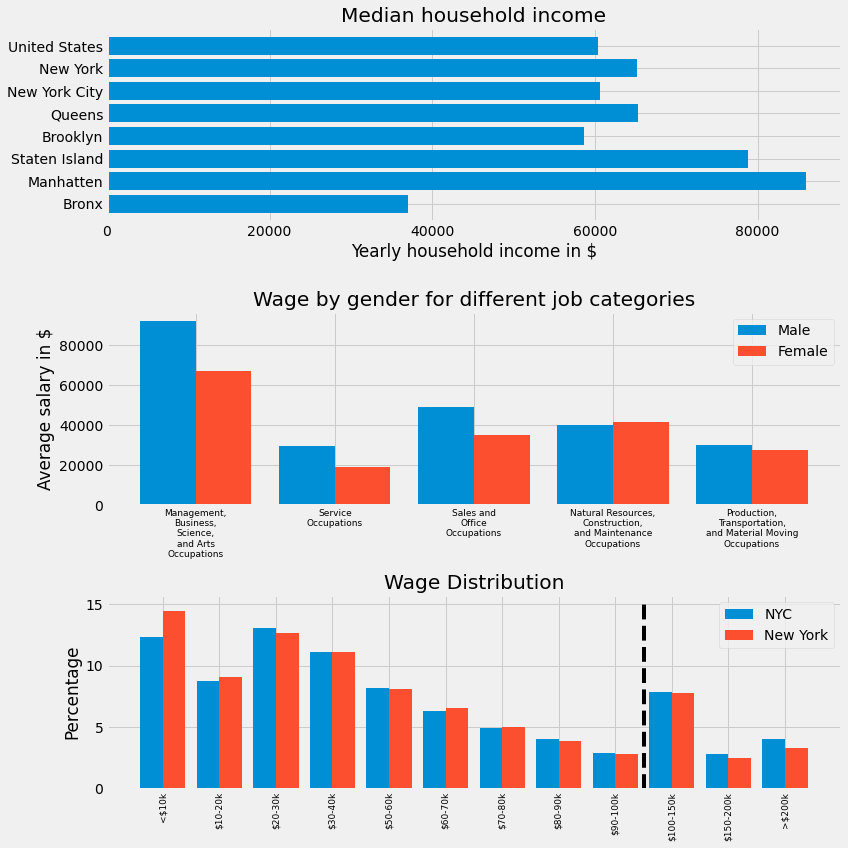

In [106]:
# Graphing details about NYC wages

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))

# Plotting median household income
x = np.arange(8)
ax1.barh(x, [h_bronx_income_median, h_manhatten_income_median,
             h_staten_island_income_median, h_brooklyn_income_median,
             h_queens_income_median, h_nyc_income_median, housing_income_median, 
             us_income_median])

ax1.set_yticks(x)
ax1.set_yticklabels(['Bronx', 'Manhatten', 'Staten Island', 
                     'Brooklyn', 'Queens', 'New York City', 
                     'New York', 'United States'])
ax1.set_xlabel('Yearly household income in $')

ax1.set_title('Median household income')

# Plotting wage by gender in common jobs
width = 0.4
x = np.arange(5) + 1

ax2.bar(x - width / 2, wages_male, width=width, label='Male')
ax2.bar(x + width / 2, wages_female, width=width, label='Female')

ax2.legend()
ax2.set_xticks(x)
ax2.set_xticklabels(occ_categories, rotation=0, fontsize=9)
ax2.set_ylabel('Average salary in $')

ax2.set_title('Wage by gender for different job categories')

# Plotting wage distribution
width = 0.4
x = np.arange(len(wages_nyc)) + 1

ax3.bar(x - width / 2, np.asarray(wages_nyc) * 100, width=width, label='NYC')
ax3.bar(x + width / 2, np.asarray(wages_ny) * 100, width=width, label='New York')

ax3.legend()
ax3.set_xticks(x)
ax3.set_xticklabels(wage_bins.keys(), rotation=90, fontsize=9)
ax3.set_ylabel('Percentage')
ax3.vlines(x=9.5, ymin=0, ymax=15, linestyle='--')

ax3.set_title('Wage Distribution')

fig.tight_layout()